# **KNN: Water Potability**

## **Data Preparation**
kaggle: https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?resource=download

In [2]:
# Import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## **Basic Data Exploration**

In [4]:
# Display the first few rows of the dataset
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [5]:
# Get summary statistics
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


In [6]:
# Check for missing values
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [7]:
# Get data types of columns
print(df.dtypes)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [8]:
# Check the shape of the dataset
print(df.shape)

(3276, 10)


## **Data Visualization**

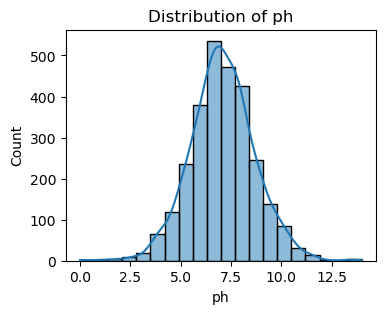

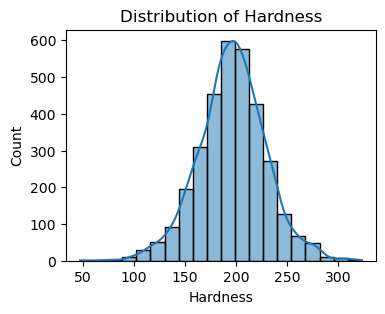

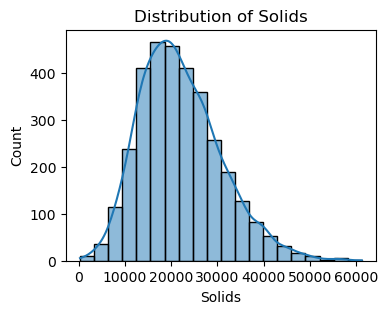

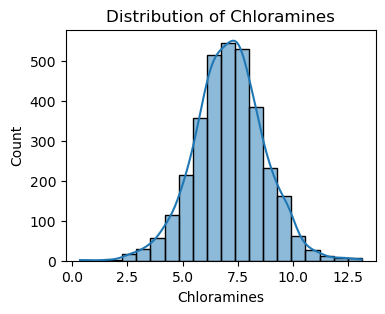

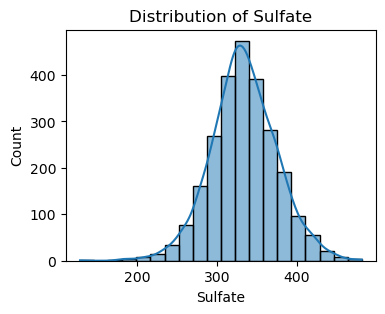

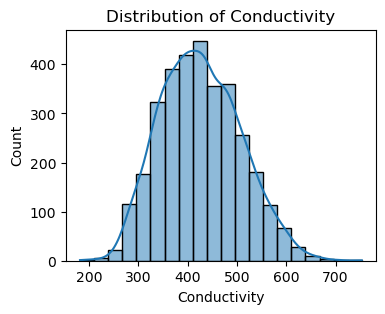

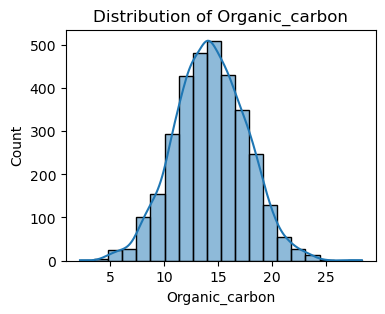

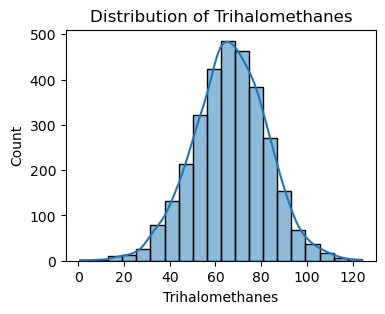

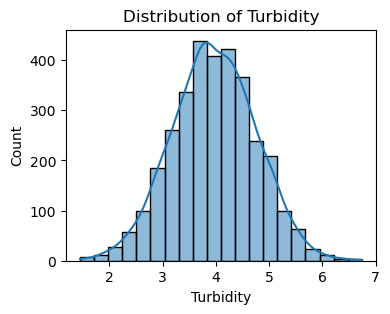

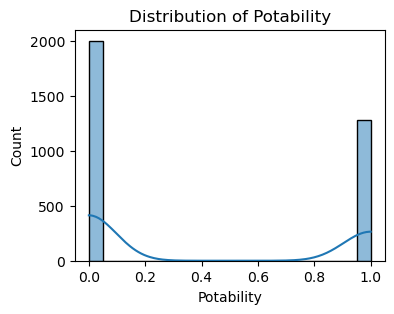

In [9]:
# Plot histograms for numerical variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(data=df, x=col, kde=True, bins=20) # kde: Kernel Density Estimate
    plt.title(f'Distribution of {col}') # f-string
    plt.show()

## **Data Preprocessing**

In [10]:
# Mean Imputation
df['ph'].fillna(df['ph'].mean(),inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [11]:
# Check for missing values again
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


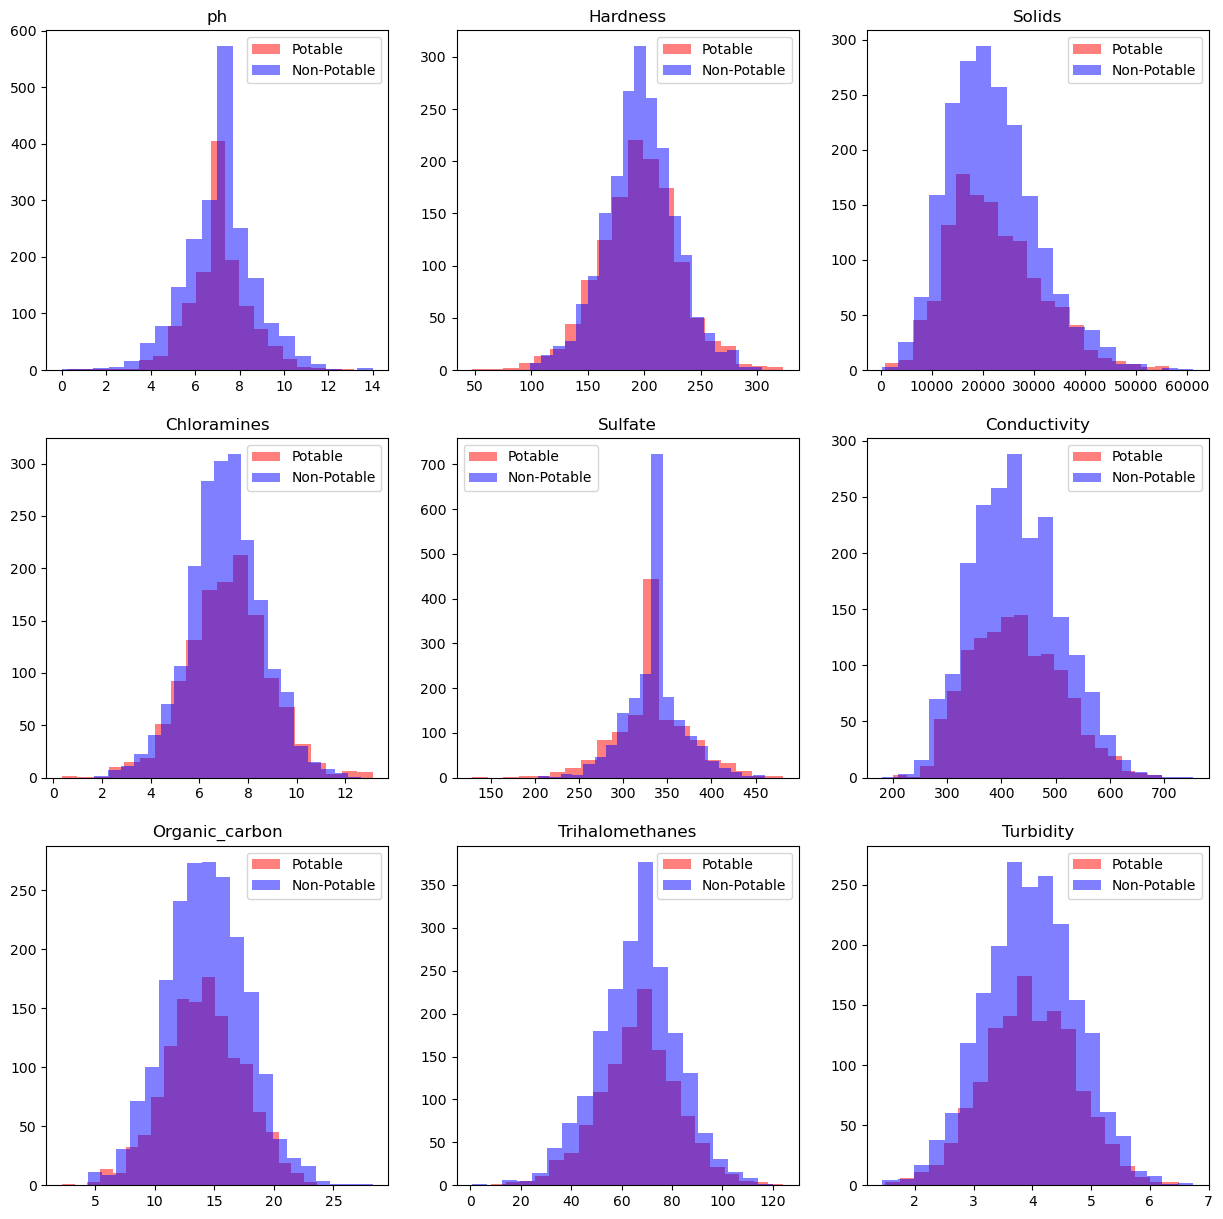

In [15]:
# Check out the data distribution by dividing the data set into potability and non-potability
df_pot = df[df['Potability']==1]
df_nonpot = df[df['Potability']==0]

plt.figure(figsize=(15,15))
for i, feature in enumerate(df.columns[0:9]):
    plt.subplot(3, 3, i+1)
    plt.hist(df_pot[feature], bins=20, color='r', alpha=0.5, label='Potable')
    plt.hist(df_nonpot[feature], bins=20, color='b', alpha=0.5, label='Non-Potable')
    plt.legend()
    plt.title(feature)

Potability
0    1998
1    1278
Name: count, dtype: int64


<BarContainer object of 2 artists>

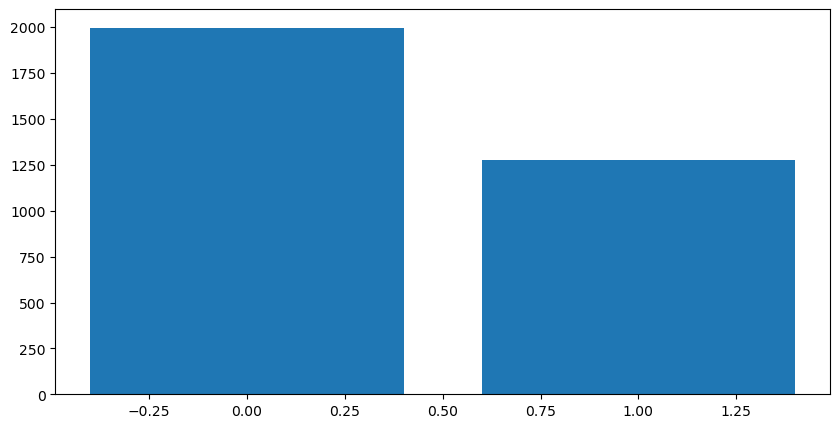

In [19]:
# Check out the number of potable and non-potable water
print(df['Potability'].value_counts())

plt.figure(figsize=(10,5))
plt.bar(df['Potability'].value_counts().index, df['Potability'].value_counts().values)

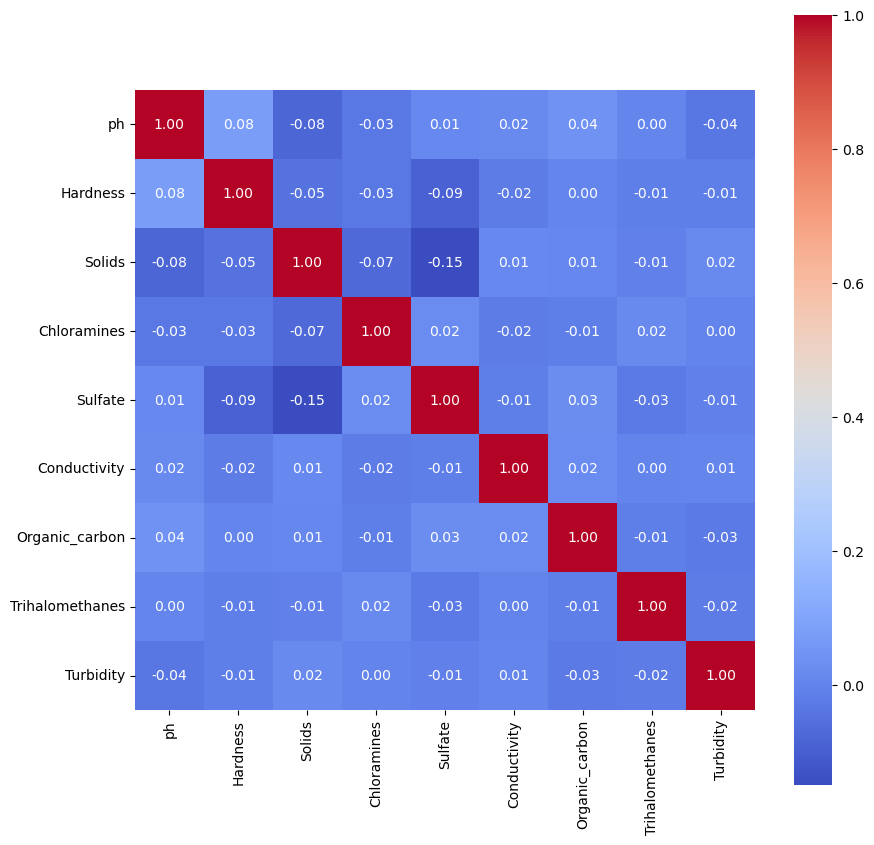

In [21]:
# Check out the correlations between features

plt.figure(figsize=(10,10))

sns.heatmap(df.drop(columns='Potability').corr(), annot=True, fmt= '.2f', square=True, cmap='coolwarm')
plt.show()

#### In overall, there is not an issue regarding multicollinearity. We can proceed with the current dataset.

## **Use KNN model without spliting the current data set.**

In [23]:
df_origin = df.copy()

df_features = df.drop(columns='Potability')
df_target = df['Potability']

display(df_features.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [25]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)

kn.fit(df_features, df_target)

KNeighborsClassifier()

In [26]:
kn.score(df_features, df_target)

0.7112332112332113

In [27]:
df['predicted_with_all_features'] = kn.predict(df_features)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,predicted_with_all_features
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0


In [29]:
# Find two features with the highest correlation.
df.corr()['Potability'].sort_values(ascending=False)

Potability                     1.000000
predicted_with_all_features    0.371706
Solids                         0.033743
Chloramines                    0.023779
Trihalomethanes                0.006960
Turbidity                      0.001581
ph                            -0.003287
Conductivity                  -0.008128
Hardness                      -0.013837
Sulfate                       -0.020619
Organic_carbon                -0.030001
Name: Potability, dtype: float64

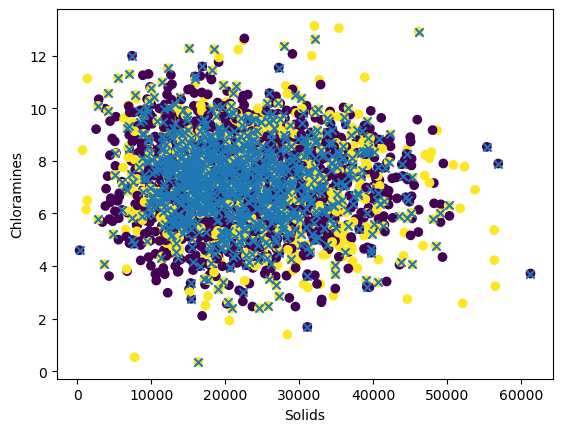

In [30]:
# Draw a scatter plot by using Solids as x and Chloramines as y
# color = df_target
# mark data points when the values of predicted_with_all_features are different from targets.

plt.scatter(df['Solids'], df['Chloramines'], c=df_target)
plt.scatter(
    df[df['Potability']!=df['predicted_with_all_features']]['Solids'],
    df[df['Potability']!=df['predicted_with_all_features']]['Chloramines'],
    marker='x'
)
plt.xlabel('Solids')
plt.ylabel('Chloramines')
plt.show()

## **Split the total data into training and test data**

In [31]:
from sklearn.model_selection import train_test_split

df_features = df.drop(columns=['Potability', 'predicted_with_all_features'])

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42, stratify=df_target)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(y_train.value_counts(), y_train.value_counts() / y_train.shape[0] * 100)
print(y_test.value_counts(), y_test.value_counts() / y_test.shape[0] * 100)

(2620, 9) (656, 9) (2620,) (656,)
Potability
0    1598
1    1022
Name: count, dtype: int64 Potability
0    60.992366
1    39.007634
Name: count, dtype: float64
Potability
0    400
1    256
Name: count, dtype: int64 Potability
0    60.97561
1    39.02439
Name: count, dtype: float64


In [32]:
# Normalize train and test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Assign column names to X_train_scaled
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [34]:
!pip install statsmodels

In [35]:
kn = KNeighborsClassifier(n_neighbors=5)

kn.fit(X_train_scaled, y_train)
kn.score(X_train_scaled, y_train)

0.7633587786259542

In [36]:
# We can notice a little improvement on the score compare to the previous one of 0.7112332112332113.
# Now let's check the score in the validation set
kn.score(X_test_scaled, y_test)

0.6112804878048781

In [37]:
# We can guess that overfitting has occured because the score of the validation set is lower than that of the training set
# Let's apply feature selection in order to solve this issue

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_train_scaled, y_train)

X_train_scaled_selected = selector.transform(X_train_scaled)
X_test_scaled_selected = selector.transform(X_test_scaled)

X_train_scaled_selected.shape, X_test_scaled_selected.shape

((2620, 5), (656, 5))

In [38]:
selected_features = df_features.columns[selector.get_support()]
selected_features

Index(['ph', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon'], dtype='object')

In [39]:
kn_selected = KNeighborsClassifier(n_neighbors=5)
kn_selected.fit(X_train_scaled_selected, y_train)
kn_selected.score(X_train_scaled_selected, y_train)

0.732442748091603

In [40]:
# The score of the training data got worse. ㅜㅜ
# What about the score of the test data?
kn_selected.score(X_test_scaled_selected, y_test)

0.6204268292682927

In [41]:
# We can see a little bit improvement on the score of the test data (previous: 0.6112804878048781)
df_X_test_scaled_selected = pd.DataFrame(X_test_scaled_selected, columns=selected_features)
print(df_X_test_scaled_selected.shape)
print(y_test.shape)
df_X_test_scaled_selected['Potability'] = y_test.values
df_X_test_scaled_selected['predicted_with_selected_features'] = kn_selected.predict(X_test_scaled_selected)
df_X_test_scaled_selected.head()


(656, 5)
(656,)


,ph,Solids,Chloramines,Sulfate,Organic_carbon,Potability,predicted_with_selected_features
0,-0.004031,-0.325470,-0.676788,-0.004457,0.265884,1,0
1,-0.622155,-1.300395,0.379131,-0.315128,2.112074,0,0
2,-0.004031,0.469844,0.433350,0.676081,0.053165,0,0
3,-0.488364,1.435043,1.284983,-1.065130,-1.535066,0,1
4,-0.643687,0.548021,0.294471,-0.129885,0.474402,0,0


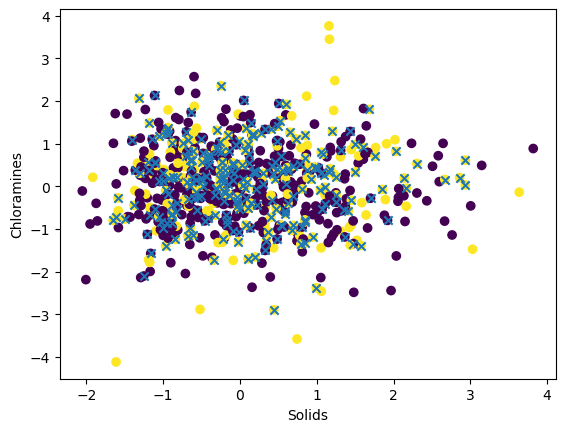

In [44]:
# Draw a scatter plot by using Solids as x and Chloramines as y
# color = 'Potabiliity'
# Mark the data points when the values of predicted_with_selected_features are different from Potability

plt.scatter(df_X_test_scaled_selected['Solids'], df_X_test_scaled_selected['Chloramines'], c=df_X_test_scaled_selected['Potability'])
plt.scatter(
    df_X_test_scaled_selected[df_X_test_scaled_selected['Potability'] != df_X_test_scaled_selected['predicted_with_selected_features']]['Solids'],
    df_X_test_scaled_selected[df_X_test_scaled_selected['Potability'] != df_X_test_scaled_selected['predicted_with_selected_features']]['Chloramines'],
    marker='x',
)
plt.xlabel('Solids')
plt.ylabel('Chloramines')
plt.show()

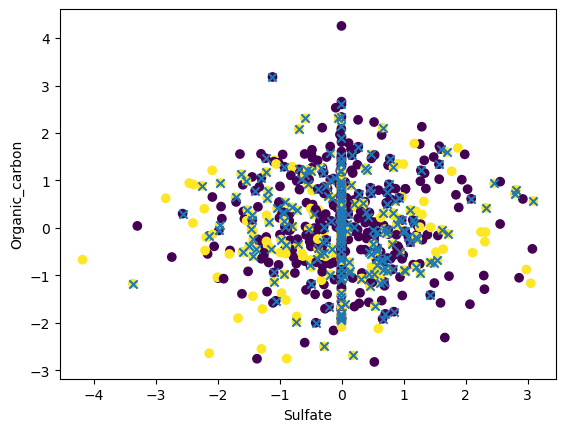

In [45]:
# Draw a scatter plot by using Sulfate as x and Organic_carbon as y
plt.scatter(df_X_test_scaled_selected['Sulfate'], df_X_test_scaled_selected['Organic_carbon'], c=df_X_test_scaled_selected['Potability'])
plt.scatter(
    df_X_test_scaled_selected[df_X_test_scaled_selected['Potability'] != df_X_test_scaled_selected['predicted_with_selected_features']]['Sulfate'],
    df_X_test_scaled_selected[df_X_test_scaled_selected['Potability'] != df_X_test_scaled_selected['predicted_with_selected_features']]['Organic_carbon'],
    marker='x',
)
plt.xlabel('Sulfate')
plt.ylabel('Organic_carbon')
plt.show()

In [ ]:
# It is hard to predict potability of water by using KNN model. I will try using other advanced models for the prediction later on.